# TRABAJO - CIENCIA DE DATOS II - VISIÓN POR COMPUTADOR

### Descargando datos al entorno

In [ ]:
!gdown 1C2nL1GZljQ6gaODY2eMkY_MnyuRb342V -O datos.zip
!unzip -q datos.zip -d datos
!ls datos

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1C2nL1GZljQ6gaODY2eMkY_MnyuRb342V
From (redirected): https://drive.google.com/uc?id=1C2nL1GZljQ6gaODY2eMkY_MnyuRb342V&confirm=t&uuid=0a0726b7-3ab2-4035-b197-94a03a29de80
To: /content/datos.zip
100% 1.74G/1.74G [00:39<00:00, 44.3MB/s]
content


In [ ]:
!rm datos.zip

In [ ]:
#Después de pasar la carpeta  la carpeta de interés
!mv /content/datos/content/drive/MyDrive/PlateNumbers.v1i.yolov11 /content/
!rm -rf datos

mv: cannot move '/content/datos/content/drive/MyDrive/PlateNumbers.v1i.yolov11' to '/content/PlateNumbers.v1i.yolov11': Directory not empty


## You Only Look Once - YOLOv11

![YOLOv11](https://i.ibb.co/x8X5hvkK/YOLO11.png)

### Reconocimiento de Placas Vehiculares con YOLOv11 y OCR

In [ ]:
#!pip -q install ultralytics

from IPython.display import Image as IPyImage
from ultralytics import YOLO
import yaml

### Etrenamiento (USAR T4)

In [ ]:
data = {
    'path': '/content/PlateNumbers.v1i.yolov11',
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'names': {
        0: ['Placa']
    }
}

with open('/content/PlateNumbers.v1i.yolov11/data.yaml', 'w') as file:
    yaml.dump(data, file,
              default_flow_style = False,
              sort_keys = False)

In [ ]:
# model = YOLO("yolo11n.pt")
# results = model.train(data = "/content/PlateNumbers.v1i.yolov11/data.yaml", # Changed this line
#                       epochs = 5,
#                       imgsz = 640,
#                       plots = True,
#                     )

100%|██████████| 5.35M/5.35M [00:00<00:00, 306MB/s]


Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/PlateNumbers.v1i.yolov11/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

100%|██████████| 755k/755k [00:00<00:00, 54.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/PlateNumbers.v1i.yolov11/train/labels... 1134 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1134/1134 [00:03<00:00, 363.03it/s]

train: New cache created: /content/PlateNumbers.v1i.yolov11/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/PlateNumbers.v1i.yolov11/valid/labels... 106 images, 0 backgrounds, 0 corrupt: 100%|██████████| 106/106 [00:00<00:00, 302.18it/s]

val: New cache created: /content/PlateNumbers.v1i.yolov11/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 186, len(boxes) = 203. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.41G      1.917      3.648      1.039         46        640: 100%|██████████| 71/71 [01:46<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]

                   all        106        203    0.00516      0.808     0.0307    0.00888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.54G      1.618      1.941     0.8962         44        640: 100%|██████████| 71/71 [01:35<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        106        203      0.778      0.793      0.829      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.54G      1.546      1.585     0.8957         37        640: 100%|██████████| 71/71 [01:34<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        106        203      0.788      0.813      0.871       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.54G      1.485      1.399     0.8773         44        640: 100%|██████████| 71/71 [01:34<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        106        203      0.845      0.808      0.873      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.54G      1.412      1.238     0.8703         39        640: 100%|██████████| 71/71 [01:38<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all        106        203      0.851      0.857      0.895        0.5



5 epochs completed in 0.144 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.20s/it]


                   all        106        203      0.851      0.871      0.896        0.5
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train


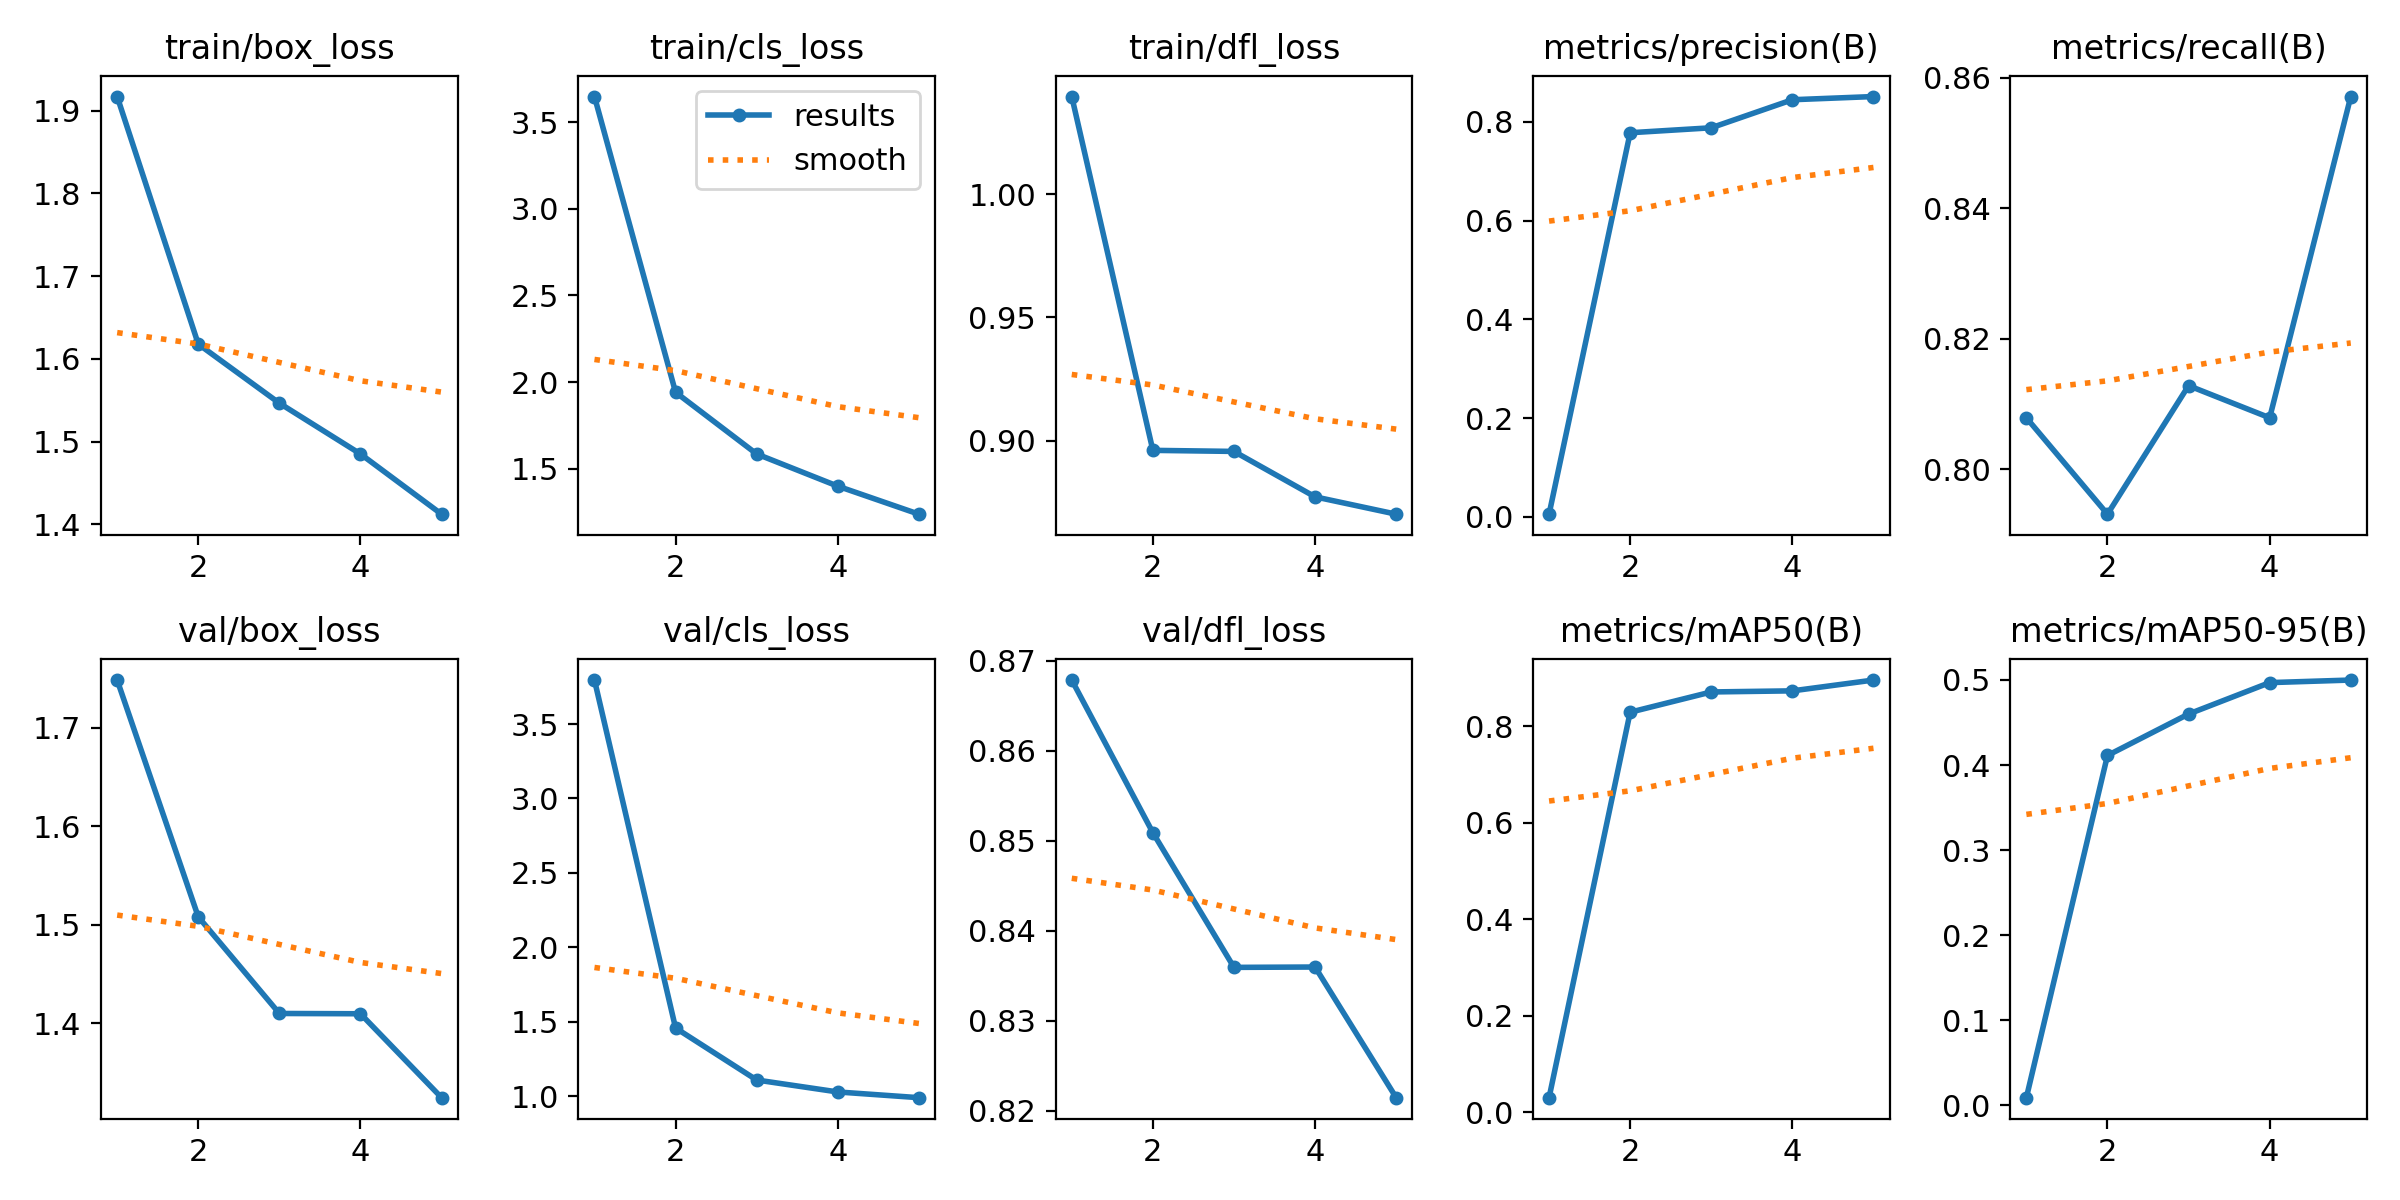

In [ ]:
IPyImage(filename='/content/runs/detect/train/results.png', width = 1600)

### Cargando Modelo Entrenado

In [ ]:
model = YOLO("/content/best.pt")
preds = model("/content/PlateNumbers.v1i.yolov11/test/images/")


image 1/24 /content/PlateNumbers.v1i.yolov11/test/images/Foto-Placa-107-_jpg.rf.77a3ee1791592c197a2d736401a05a1e.jpg: 640x480 2 ['Placa']s, 139.8ms
image 2/24 /content/PlateNumbers.v1i.yolov11/test/images/Foto-Placa-127-_jpg.rf.6b1721c8552f1744bab673d565cc944d.jpg: 640x480 1 ['Placa'], 135.5ms
image 3/24 /content/PlateNumbers.v1i.yolov11/test/images/Foto-Placa-136-_jpg.rf.46ad1cc345c40f2a71cc10585a164c5e.jpg: 640x480 5 ['Placa']s, 136.5ms
image 4/24 /content/PlateNumbers.v1i.yolov11/test/images/Foto-Placa-140-_jpg.rf.c199ceaf47db9cd5d9cc847054d78228.jpg: 640x480 1 ['Placa'], 133.5ms
image 5/24 /content/PlateNumbers.v1i.yolov11/test/images/Foto-Placa-143-_jpg.rf.606b600fbb129ec91c9af6b5725429a8.jpg: 640x480 1 ['Placa'], 134.0ms
image 6/24 /content/PlateNumbers.v1i.yolov11/test/images/Foto-Placa-163-_jpg.rf.4f7f880a9ab401eeaa63737949b1613a.jpg: 640x480 3 ['Placa']s, 151.3ms
image 7/24 /content/PlateNumbers.v1i.yolov11/test/images/Foto-Placa-199-_jpg.rf.214dcc29ce747bce58eb4e5d2a0dd628.j

In [ ]:
import matplotlib.pyplot as plt
import cv2

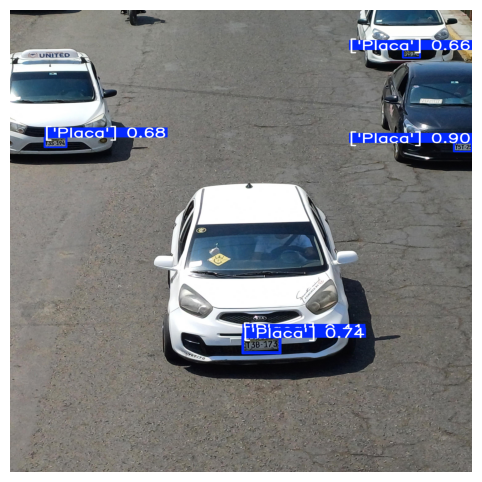

In [ ]:
image_with_preds = preds[2].plot()
resized_img = cv2.resize(image_with_preds, (1920, 1920))

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

### Extracción de placas con OCR

#### EasyOCR
- Problemas en la detección de placas. Probar con imágenes donde se vea un poco mas cerca.
- Intentar otros filtros y preprocesamientos de la imagen obtenida de las placas luego aplicar el OCR.
- Probar regex y limitar los tipos de caracteres que pueden aparecer en una placa.

In [ ]:
!pip -q install easyocr
import easyocr

In [ ]:
img = "/content/PlateNumbers.v1i.yolov11/test/images/Foto-Placa-227-_jpg.rf.7e7a78be6f6ea417021b7ab78f670f31.jpg"
results = model(img)
reader = easyocr.Reader(["en"])

textos_detectados = []
image = cv2.imread(img)

# for i, box in enumerate(results[0].boxes.xyxy):
#     x1, y1, x2, y2 = map(int, box)

#     placa = image[y1:y2, x1:x2]

#     placa_path = f"placa_{i}.jpg"
#     cv2.imwrite(placa_path, placa)

#     ocr_result = reader.readtext(placa)
#     texto_placa = " ".join([res[1] for res in ocr_result]) if ocr_result else "No detectado"

#     textos_detectados.append(texto_placa)
#     print(f"Placa {i}: {texto_placa}")

# print("📌 Placas detectadas:", textos_detectados)


image 1/1 /content/PlateNumbers.v1i.yolov11/test/images/Foto-Placa-227-_jpg.rf.7e7a78be6f6ea417021b7ab78f670f31.jpg: 640x480 6 ['Placa']s, 233.9ms
Speed: 5.9ms preprocess, 233.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


In [ ]:
def preprocesar_imagen(placa):
    gris = cv2.cvtColor(placa, cv2.COLOR_BGR2GRAY)

    desenfoque = cv2.GaussianBlur(gris, (3, 3), 0)
    _, binaria = cv2.threshold(desenfoque, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binaria

In [ ]:
for i, box in enumerate(results[0].boxes.xyxy):
    x1, y1, x2, y2 = map(int, box)

    # Recortar la placa
    placa = image[y1:y2, x1:x2]

    # Preprocesar la placa antes del OCR
    placa_procesada = preprocesar_imagen(placa)

    # Guardar la placa procesada para revisar visualmente (opcional)
    placa_path = f"placa_{i}_procesada.jpg"
    cv2.imwrite(placa_path, placa_procesada)

    # Aplicar OCR
    ocr_result = reader.readtext(placa_procesada)

    # Extraer solo el texto detectado
    texto_placa = " ".join([res[1] for res in ocr_result]) if ocr_result else "No detectado"

    textos_detectados.append(texto_placa)
    print(f"Placa {i}: {texto_placa}")

print("📌 Placas detectadas:", textos_detectados)

Placa 0: I771
Placa 1: 'Fsyie3
Placa 2: iead
Placa 3: No detectado
Placa 4: Moz
Placa 5: I1U71
📌 Placas detectadas: ['I771', "'Fsyie3", 'iead', 'No detectado', 'Moz', 'I1U71']


#### PyTeseract

In [ ]:
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

import pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,834 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
img = "/content/PlateNumbers.v1i.yolov11/test/images/Foto-Placa-127-_jpg.rf.6b1721c8552f1744bab673d565cc944d.jpg"
results = model(img)

# Lista para almacenar textos detectados
textos_detectados = []

# Cargar la imagen original
image = cv2.imread(img)

for i, box in enumerate(results[0].boxes.xyxy):
    x1, y1, x2, y2 = map(int, box)

    # Recortar la placa
    placa = image[y1:y2, x1:x2]

    # Preprocesar la placa antes del OCR
    placa_procesada = preprocesar_imagen(placa)

    # Guardar la placa procesada para revisar visualmente (opcional)
    placa_path = f"placa_{i}_procesada.jpg"
    cv2.imwrite(placa_path, placa_procesada)

    # Aplicar OCR con Tesseract
    ocr_result = pytesseract.image_to_string(placa_procesada, config="--psm 7")

    # Limpiar el texto (eliminar espacios en blanco y saltos de línea)
    texto_placa = ocr_result.strip().replace("\n", "")

    textos_detectados.append(texto_placa)
    print(f"Placa {i}: {texto_placa}")

print("📌 Placas detectadas:", textos_detectados)


image 1/1 /content/PlateNumbers.v1i.yolov11/test/images/Foto-Placa-127-_jpg.rf.6b1721c8552f1744bab673d565cc944d.jpg: 640x480 1 ['Placa'], 144.6ms
Speed: 4.2ms preprocess, 144.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Placa 0: Ya 703:
📌 Placas detectadas: ['Ya 703:']
